In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pls


In [2]:
training_data = pd.read_csv('Tshirt_Sizing_Dataset_KNN')

In [3]:
training_data

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [4]:
training_data.tail(3)

,Height (in cms),Weight (in kgs),T Shirt Size
15,170,63,L
16,170,64,L
17,170,68,L


# Create testing and dataset

In [5]:
X = training_data.iloc[:, 0:2].values

In [6]:
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [7]:
y = training_data.iloc[:, 2:].values


In [8]:
y

array([['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L']], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state = 5)

In [12]:
X_train.shape

(13, 2)

In [13]:
y_train.shape

(13,)

In [14]:
X_test.shape

(5, 2)

In [15]:
y_test.shape

(5,)

# Model Training

In [16]:
from sklearn.neighbors import KNeighborsClassifier


In [17]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# Model Testing

In [18]:
y_predict = classifier.predict(X_test)

In [19]:
y_predict

array([1, 1, 0, 1, 0])

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

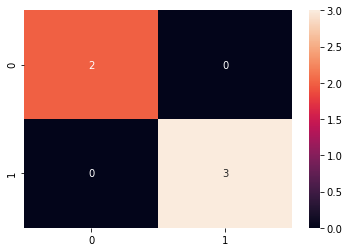

In [21]:
cm = confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [84]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

